ipython notebook demo. `jupyter` is strongly recommended to install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
import Image
%matplotlib inline
caffe_root = '../../'
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
data_root = '../../data/sk506/'
test_dir = data_root+'test/'

In [2]:
def plot_single_scale(scale_lst, size):
    pylab.rcParams['figure.figsize'] = size, size/2
    plt.figure()
    for i in range(0, len(scale_lst)):
        s=plt.subplot(1,5,i+1)
        plt.imshow(scale_lst[i], cmap = cm.Greys)
        s.set_xticklabels([])
        s.set_yticklabels([])
        s.yaxis.set_ticks_position('none')
        s.xaxis.set_ticks_position('none')
    plt.tight_layout()

image file name

In [3]:
img_file_name = '121.jpg'

In [4]:
img_file_name = '121.jpg'
img = Image.open(test_dir+img_file_name)
img = np.array(img, dtype=np.float32)
img = img[:,:,::-1]
img -= np.array((104.00698793,116.66876762,122.67891434))
img = img.transpose((2,0,1))
caffe.set_mode_gpu()
caffe.set_device(0)

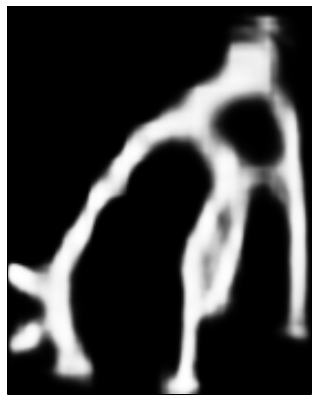

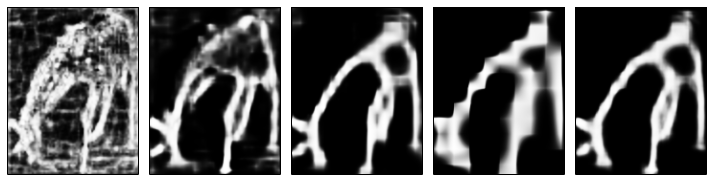

In [5]:
model_root = './'
net = caffe.Net(model_root+'deploy.prototxt','sk506_it14k.caffemodel', caffe.TEST)
# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *img.shape)
net.blobs['data'].data[...] = img
# run net and take argmax for prediction
net.forward()
up8w = net.params['upsample-8'][0].data
up8b = net.params['upsample-8'][1].data
blobs = net.blobs
out2 = net.blobs['dsn2-out'].data[0][0,:,:]
out3 = net.blobs['dsn3-out'].data[0][0,:,:]
out4 = net.blobs['dsn4-out'].data[0][0,:,:]
out5 = net.blobs['dsn5-out'].data[0][0,:,:]
fuse = net.blobs['fuse-out'].data[0][0,:,:]
fuse_full = net.blobs['fuse-out'].data[0][:,:,:]
#fuse = net.blobs['sigmoid-fuse'].data[0][0,:,:]
scale_lst = [fuse]
plot_single_scale(scale_lst, 22)
scale_lst = [out2, out3, out4, out5, fuse]
plot_single_scale(scale_lst, 10)

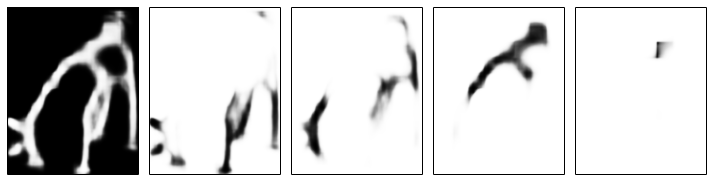

In [6]:
scale_lst = [np.squeeze(fuse_full[0,:,:]), np.squeeze(fuse_full[1,:,:]), np.squeeze(fuse_full[2,:,:]), \
             np.squeeze(fuse_full[3,:,:]),np.squeeze(fuse_full[4,:,:])]
plot_single_scale(scale_lst, 10)